# REAP: Rice Efficacy Across Philippines: A Data-Driven Cross-Dataset Analysis with India

### Project Objectives
This project entails a comparative analysis between the agricultural practices of India and the Philippines, with a specific focus on rice cultivation. Python will be employed for data analytics, aiming to provide meaningful insights into the similarities and differences between these two methods. The project seeks to identify key factors contributing to the effectiveness of these practices, while highlighting areas for potential improvement.

### Walkthrough

#### Datasets Acquisition
In this section, we will provide an overview of the datasets included in our study.

    1. Rice and Production Datasets
    2. Climate and Weather Datasets
    3. Soil Characteristics Datasets
    4. Agricultural Practices Datasets
    5. Socioeconomic and Demographic Datasets
    6. Policy and Trade Datasets
    

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import os

from array import array

%matplotlib inline

In [10]:
check_indProd = pd.read_csv('Datasets/ind_AgriculturalPracticesDatasets_verified.csv')
check_indProd.head(5)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [62]:
# Drop the rows that does not contain the word "Rice"
new_indProd = check_indProd.dropna(subset=['Crop'])
new_indProd = check_indProd[check_indProd['Crop'].str.contains('Rice')]

new_indProd.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
468,Andaman and Nicobar Island,NICOBARS,Rice,2007,Kharif,7333.75,21864.0,2.98
469,Andaman and Nicobar Island,NICOBARS,Rice,2008,Autumn,7900.00,14730.0,1.86
470,Andaman and Nicobar Island,NICOBARS,Rice,2009,Autumn,8140.00,16600.0,2.04
471,Andaman and Nicobar Island,NICOBARS,Rice,2000,Kharif,102.00,321.0,3.15
472,Andaman and Nicobar Island,NICOBARS,Rice,2001,Kharif,83.00,300.0,3.61


In [163]:
check_phiProd = pd.read_csv('Datasets/phi_AgriculturalPracticesDatasets_verified.csv')
check_phiProd.head(5)

,Crop,Provinces,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Irrigated Palay,Abra,8620,8120,8720,8810,8470,8230,8160,7610,...,14920.0,14950.0,14927.0,14919.0,14934.0,14480.0,14549.0,14548.87,14549.27,14548.90
1,Irrigated Palay,Apayao,..,..,..,..,..,..,..,10990,...,17358.0,16267.4,16270.0,15968.0,16877.0,15933.0,17522.0,17805.46,17137.00,17110.03
2,Irrigated Palay,Benguet,3320,3580,3950,3600,2990,3430,3630,3860,...,5200.0,5200.0,5200.0,5276.0,5755.0,5877.0,5903.0,5903.00,5903.00,5903.32
3,Irrigated Palay,Ifugao,9740,9020,9430,8410,7110,9040,9030,8850,...,16374.0,16399.0,16399.0,16393.0,16388.0,16382.0,15582.0,14899.82,12236.33,11246.65
4,Irrigated Palay,Kalinga,25520,28380,22420,24700,23740,23900,24390,20020,...,35023.0,35098.0,29485.0,31244.0,34011.0,33515.0,32656.0,23570.00,26477.81,26454.49


In [233]:
check_indProd['Production'] = check_indProd['Production'].astype(float)
yr_indVal = check_indProd['Crop_Year'].sort_values().unique()

in_prdVal = array('i', [])

for value in check_indProd['Production'].items():
    if value == '..':
        check_indProd.at[index, 'Production'] = 0

for value in yr_indVal:
    in_prodTbl = check_indProd.loc[check_indProd['Crop_Year'] == value, 'Production'].sum()
    in_prdVal.append(in_prodTbl.astype(int))

print(yr_indVal)

[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [281]:
check_phiProd = pd.read_csv('Datasets/phi_AgriculturalPracticesDatasets_verified.csv')
ph_prdVal = array('i', [])

columns_to_exclude = check_phiProd.columns[:2]
data = check_phiProd.drop(columns_to_exclude, axis=1)

for yr_idx, yr_val in enumerate(data.columns):
    for index, value in check_phiProd[yr_val].items():
        if value == '..':
            check_phiProd.at[index, yr_val] = 0
    
    new_yr = int(yr_val)
    
    if 1997 <= new_yr <= 2020:
        prod_val = check_phiProd[yr_val].astype(int)
        ph_prdVal.append(prod_val.sum())
        

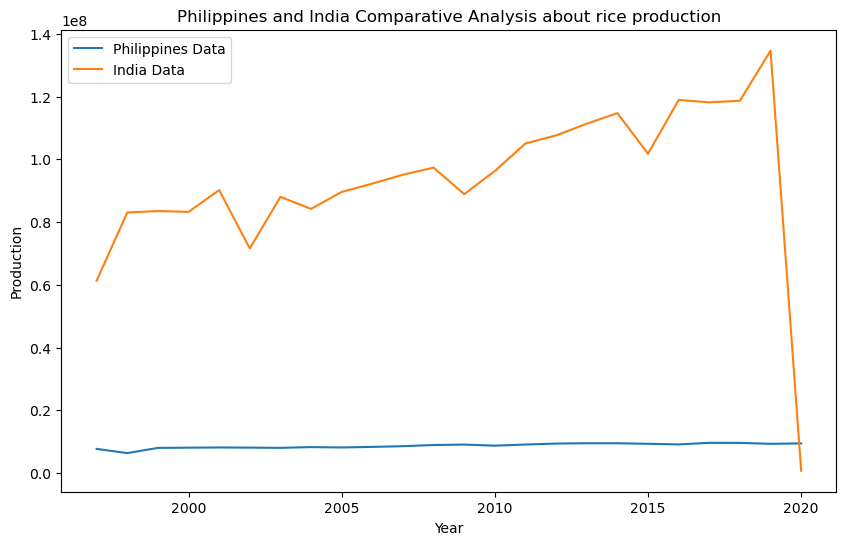

In [282]:
#displaying results

mpl.figure(figsize=(10, 6))

mpl.plot(yr_indVal, ph_prdVal, label='Philippines Data')
mpl.plot(yr_indVal, in_prdVal, label='India Data')

mpl.xlabel('Year')
mpl.ylabel('Production')
mpl.title('Philippines and India Comparative Analysis about rice production')

mpl.legend()
mpl.show()